In [1]:
from GetData.GetDataMultiDimensions import get_test_data, get_train_data
from GetData.GetDataOneDimension import getData
import os

X_train, y_train, X_test, y_test = getData('BME', '../Data/OneDimension/')
X_train_arabic, y_train_arabic = get_train_data(os.path.join('../Data/MultiDimensions/arabic/arabic/Train_Arabic_Digit.txt'))
X_test_arabic, y_test_arabic = get_test_data(os.path.join('../Data/MultiDimensions/arabic/arabic/Test_Arabic_Digit.txt'))

len(X_train), len(X_test), len(X_train_arabic), len(X_test_arabic)

(30, 150, 6600, 2200)

In [2]:
import numpy as np
def subsequences(time_series, k):
    time_series = np.asarray(time_series)
    n = time_series.size
    shape = (n - k + 1, k)
    strides = time_series.strides * 2

    return np.lib.stride_tricks.as_strided(time_series, shape=shape, strides=strides)

In [3]:
from MaskingMap.Utilities.utils import cost_matrix_aw, create_mask
from MaskingMap.Utilities.linearprog import lp
from MaskingMap.Utilities.sinkhorn import sinkhorn_log_domain
def masking_map(
    xs,
    xt,
    ratio=0.1,
    sub_ratio=0.1,
    eps=1e-10,
    reg=0.0001,
    max_iterations=100000,
    thres=1e-5,
    algorithm="linear_programming"
):
    sub_length = int(np.floor(min(len(xs), len(xt))*sub_ratio))
    subs_xs = subsequences(xs, sub_length)
    subs_xt = subsequences(xt, sub_length)
    p = np.ones(len(subs_xs)) / len(subs_xs)
    q = np.ones(len(subs_xt)) / len(subs_xt)
    C = cost_matrix_aw(subs_xs, subs_xt)
    C /= C.max() + eps
    M = create_mask(C, ratio)
    if algorithm == "linear_programming":
        pi = lp(p, q, C, M)
    elif algorithm == "sinkhorn":
        pi = sinkhorn_log_domain(p, q, C, M, reg, max_iterations, thres)
    else:
        raise ValueError("algorithm must be 'linear_programming' or 'sinkhorn'!")
    cost = np.sum(pi * C)
    return cost

In [4]:
masking_map(X_train[0], X_test[70])

0.48806576815445263

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def knn_masking_map_linear_subsequence_short(
    X_train, X_test, y_train, y_test, ratio=0.1, sub_ratio=0.1, k=1
):
    clf = KNeighborsClassifier(
        n_neighbors=k,
        metric=masking_map,
        metric_params={"ratio": ratio, "sub_ratio": sub_ratio},
        n_jobs=-1,
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [6]:
accuracy = knn_masking_map_linear_subsequence_short(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

In [7]:
accuracy

0.9

In [2]:
from MaskingMap.knn import knn_masking_map_linear_subsequence_sklearn
accuracy = knn_masking_map_linear_subsequence_sklearn(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
accuracy

0.9

In [1]:
data = ["MoteStrain",
      "OliveOil",
      "Plane",
      "SmoothSubspace",
      "SonyAIBORobotSurface1",
      "SonyAIBORobotSurface2",
      "ToeSegmentation2"]

In [ ]:
import argparse
import json
import random
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import tqdm
# from MaskingMap.
# from GetData.GetDataOneDimension import getData
from MaskingMap.knn import (
    knn_masking_map_linear,
    knn_masking_map_linear_subsequence,
    knn_masking_map_linear_partial,
    knn_masking_map_non_linear,
    knn_masking_map_linear_subsequence_sklearn,
)

np.random.seed(42)
random.seed(42)
sklearn_seed = 0

: 

In [ ]:
for data_set in data:
    X_train, y_train, X_test, y_test = getData(
        data_set, "Data/OneDimension/"
    )
    best_accuracy = -100
    for k in algorithms["masking_map_linear_subsequence"]["k"]:
        with open(
            "Results/ExperimentMaskingMapLinearSubsequence.txt", "a"
        ) as file:
            file.write(f"{data_set}({k}) ")
        for ratio in algorithms["masking_map_linear_subsequence"]["ratio"]:
            for sub_ratio in algorithms["masking_map_linear_subsequence"][
                "sub_ratio"
            ]:
                accuracy = knn_masking_map_linear_subsequence_sklearn(
                    X_train=X_train,
                    X_test=X_test,
                    y_train=y_train,
                    y_test=y_test,
                    k=k,
                    ratio=ratio,
                    sub_ratio=sub_ratio,
                )
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                with open(
                    "Results/ExperimentMaskingMapLinearSubsequence.txt",
                    "a",
                ) as file:
                    if (
                        ratio
                        == algorithms["masking_map_linear_subsequence"][
                            "ratio"
                        ][
                            len(
                                algorithms[
                                    "masking_map_linear_subsequence"
                                ]["ratio"]
                            )
                            - 1
                        ]
                        and sub_ratio
                        == algorithms["masking_map_linear_subsequence"][
                            "sub_ratio"
                        ][
                            len(
                                algorithms[
                                    "masking_map_linear_subsequence"
                                ]["sub_ratio"]
                            )
                            - 1
                        ]
                    ):
                        file.write(
                            f"&({ratio};{sub_ratio}) {round(accuracy, 2)}\\\ \n"
                        )
                    else:
                        file.write(
                            f"&({ratio};{sub_ratio}) {round(accuracy, 2)} "
                        )
    with open(
        "Results/ExperimentMaskingMapLinearSubsequence.txt", "a"
    ) as file:
        file.write(f"{data_set} best result: {best_accuracy} \n")

In [1]:
import numpy as np
from GetData.GetDataMultiDimensions import getDataMultiVariate

In [6]:
from pathlib import Path
relative = Path('../Data/MultiDimensions/MSRAction3D/X_train.pkl').absolute()
relative

WindowsPath('c:/Users/hoang/OneDrive/Documents/lab/Masking-Map-Optimal-Transport-For-Sequential-Data/Experiments/../Data/MultiDimensions/MSRAction3D/X_train.pkl')

In [3]:
X_train, X_test, y_train, y_test = getDataMultiVariate("MSRAction3D", "../Data/MultiDimensions/")

In [6]:
X_train, X_test, y_train, y_test = getDataMultiVariate("MSRDailyActivity3D", "../Data/MultiDimensions/")

In [9]:
X_train, X_test, y_train, y_test = getDataMultiVariate("SpokenArabicDigit", "../Data/MultiDimensions/")

In [2]:
X_train, X_test, y_train, y_test = getDataMultiVariate("Weizmann", "../Data/MultiDimensions/")

In [10]:
X_train[1].shape, X_train[10].shape

((89, 2450), (85, 2450))

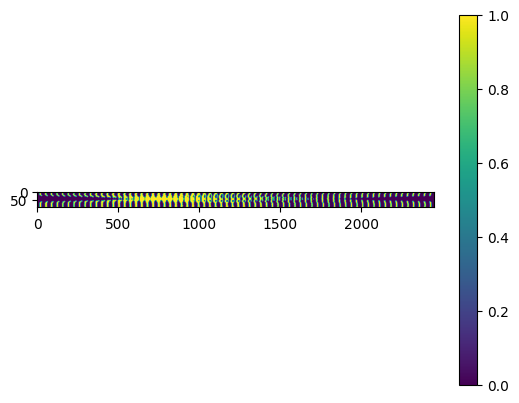

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0], cmap='viridis')
plt.colorbar()
plt.show()

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6600,), (6600,), (2200,), (2200,))

In [11]:
np.array(X_train[1]).shape, np.array(y_train[0]).shape, np.array(X_test[0]).shape, np.array(y_test[0]).shape

((39, 13), (), (28, 13), ())

In [7]:
from GetData.GetDataOneDimension import getData

In [8]:
X_train, y_train, X_test, y_test = getData("BME", "Data/OneDimension/")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/OneDimension/BME/BME_TRAIN.arff'